In [188]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline
from collections import Counter
import re

In [189]:
data = pd.read_excel("F://3rd Semester//glassdoor.xlsx", index_col=0)

In [190]:
data.sample(5)

,job_id,rating,position,company,job_city,job_state_code,sal_low,sal_high,link,description,hq_city,hq_state_code,size,industry
431,3386085524,3.5,machine learning engineer,S&P GLOBAL MARKET INTELLIGENCE,New York,NY,NaN,NaN,https://www.glassdoor.com/partner/jobListing.h...,As a Senior Application Developer for the Mark...,New York,NY,10000,Investment Banking & Asset Management
342,3204840537,2.5,data scientist,Starz Entertainment,New York,NY,118.0,168.0,https://www.glassdoor.com/partner/jobListing.h...,Tracking Code\n\nSN1000701\n\nJob Description\...,Los Angeles,CA,1000,TV Broadcast & Cable Networks
568,3367704241,4.2,senior data scientist,X4 Tech,New York,NY,NaN,NaN,https://www.glassdoor.com/partner/jobListing.h...,Job Description\nA New York City prop shop is ...,London,United Kingdom,200,Staffing & Outsourcing
146,3256468388,4.6,data engineer,MongoDB,New York,NY,123.0,167.0,https://www.glassdoor.com/partner/jobListing.h...,MongoDB is growing rapidly and seeking a Data ...,New York,NY,5000,Enterprise Software & Network Solutions
282,3227249258,3.8,data scientist,Quartet Health,New York,NY,120.0,140.0,https://www.glassdoor.com/partner/jobListing.h...,Company Description:\n\nQuartet is a healthcar...,New York,NY,500,Enterprise Software & Network Solutions


In [191]:
data = data.drop(['link'], axis =1)
data['sal_mid'] = (data['sal_low']+data['sal_high'])/2

In [192]:
data.sample(5)

,job_id,rating,position,company,job_city,job_state_code,sal_low,sal_high,description,hq_city,hq_state_code,size,industry,sal_mid
330,3030726619,3.5,data scientist,Via,New York,NY,71.0,109.0,"As a Data Scientist, you'll utilize advanced q...",Portland,OR,200,Consulting,90.0
393,3358693766,4.5,data scientist- machine learning engineer,pymetrics,New York,NY,98.0,139.0,Using neuroscience-based assessments and machi...,New York,NY,200,Enterprise Software & Network Solutions,118.5
185,3385548830,3.6,"junior software engineer, data / data engineer",Fareportal Inc.,New York,NY,71.0,97.0,(We are unable to sponsor for this role or in ...,New York,NY,5000,Travel Agencies,84.0
299,3370602991,4.0,data scientist,Qualia Investments,New York,NY,100.0,135.0,Qualia Investments is a proprietary trading de...,New York,NY,50,Enterprise Software & Network Solutions,117.5
96,3363673653,5.0,etl/azure data engineer,Sara Software Systems,Detroit,MI,NaN,NaN,_1) 4-5 years of Azure project. ETL pipelines....,Olathe,KS,50,IT Services,NaN


In [193]:
data.dtypes

job_id              int64
rating            float64
position           object
company            object
job_city           object
job_state_code     object
sal_low           float64
sal_high          float64
description        object
hq_city            object
hq_state_code      object
size                int64
industry           object
sal_mid           float64
dtype: object

In [194]:
data.shape

(611, 14)

In [ ]:
# Create variable with TRUE if nationality is USA
top = data['size'] == 10000

# Create variable with TRUE if age is greater than 50
Big = data['rating'] > 4.3

# Select all cases where nationality is USA and age is greater than 50
data[top & Big]

Text(0.5, 0, 'Number of jobs')

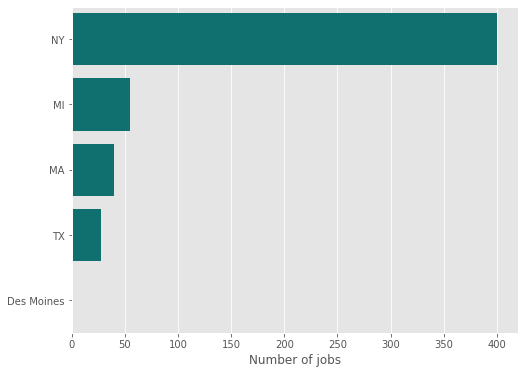

In [153]:
#Sample composition plot. As the sample is not random, can say nothing about population distribution.
plt.rcParams['figure.figsize'] = 8,6
g2  = sns.barplot(data.job_state_code.value_counts().values[:10], data.job_state_code.value_counts().index[:10], color='teal') #top ten sectors
#dummy = g2.set_xticklabels(g2.get_xticklabels(), rotation=90)
plt.xlabel('Number of jobs')

Text(0.5, 0, 'States')

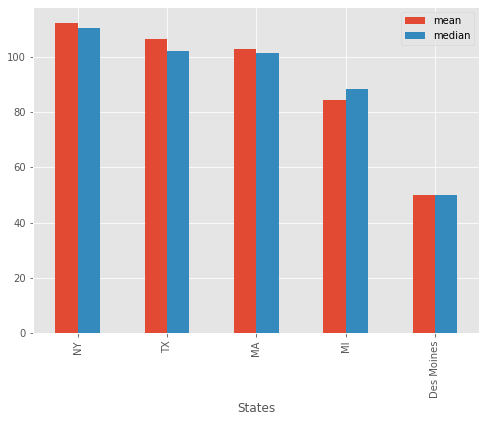

In [154]:
#MEAN SALARY FOR STATES (groupby state)
g2 = data.groupby('job_state_code').sal_mid.agg([np.mean,np.median]).sort_values(
    'mean', ascending = False).plot(kind='bar')
plt.xlabel('States')

Text(0.5, 0, 'Number of jobs')

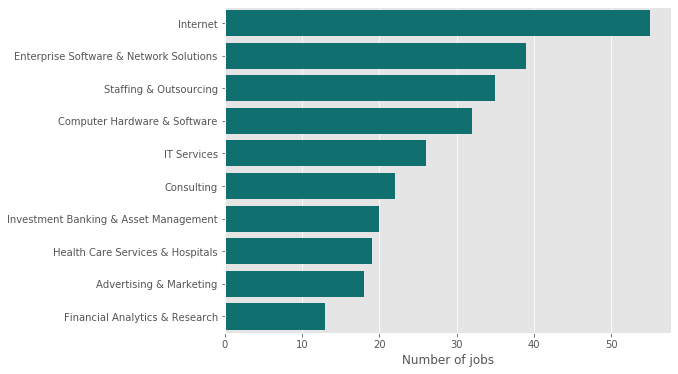

In [155]:
#which industry offers most jobs?
g = sns.barplot(data[data.job_state_code=='NY'].industry.value_counts().values[:10], 
                 data[data.job_state_code=='NY'].industry.value_counts().index[:10], color ='teal') #top ten sectors
#dummy = g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.xlabel('Number of jobs')

In [156]:
dd = data.groupby('industry')['job_id'].count().sort_values(ascending = False)
pd.DataFrame({'count':dd})

,count
industry,
Internet,79
IT Services,57
Staffing & Outsourcing,51
Computer Hardware & Software,51
Enterprise Software & Network Solutions,44
...,...
News Outlet,1
Oil & Gas Exploration & Production,1
Radio,1


Text(0.5, 0, 'Number of jobs')

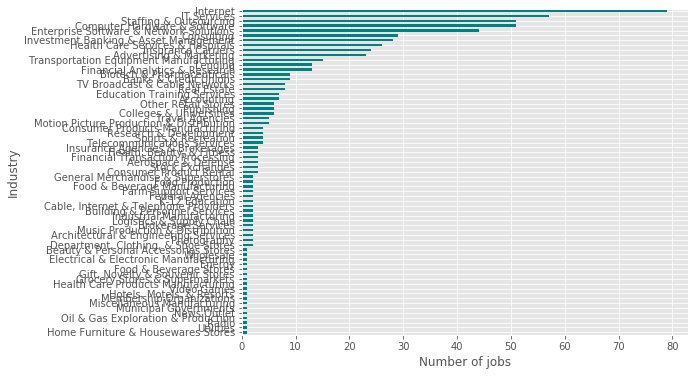

In [157]:
data.groupby('industry')['job_id'].count().sort_values().plot.barh(color = 'teal')
plt.ylabel('Industry')
plt.xlabel('Number of jobs')

Text(0.5, 0, 'Industry')

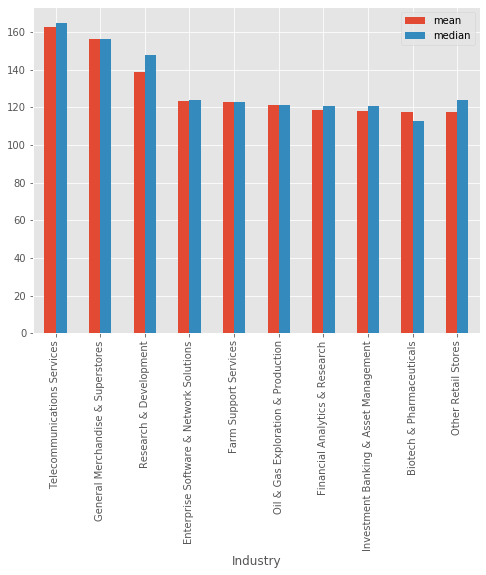

In [158]:
data.groupby('industry').sal_mid.agg([np.mean,np.median]).sort_values('mean', ascending = False)[:10].plot.bar()
plt.xlabel('Industry')

In [159]:
data.groupby('industry').median().sort_values(by='sal_mid')

,job_id,rating,sal_low,sal_high,size,sal_mid
industry,,,,,,
Architectural & Engineering Services,3.308056e+09,3.25,40.0,65.0,750.0,52.5
Industrial Manufacturing,3.378494e+09,3.45,57.5,88.5,5250.0,73.0
Energy,3.388926e+09,3.50,60.0,91.0,1000.0,75.5
Travel Agencies,3.316422e+09,3.60,67.0,94.0,5000.0,80.5
Wholesale,3.141809e+09,4.20,66.0,98.0,200.0,82.0
...,...,...,...,...,...,...
Electrical & Electronic Manufacturing,3.024306e+09,2.80,NaN,NaN,500.0,NaN
Food Production,3.290545e+09,4.85,NaN,NaN,50.0,NaN
"Hotels, Motels, & Resorts",3.342286e+09,4.70,NaN,NaN,200.0,NaN


Text(0.5, 0, 'Number of jobs')

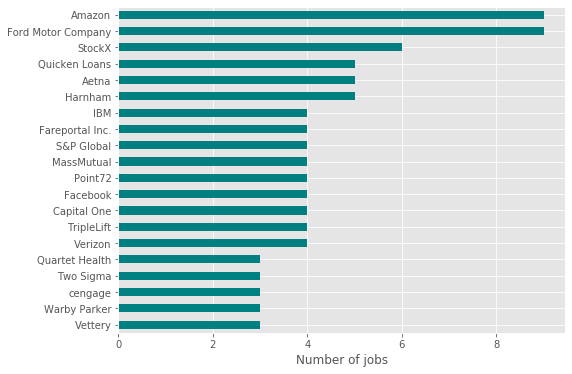

In [160]:
#top 20 companies hiring
data['company'].value_counts().head(20)[::-1].plot.barh(color='teal')
plt.xlabel('Number of jobs')

In [162]:
#top 20 best paying companies?
top_200 = data['company'].value_counts().head(200)
top_200= top_200.to_frame().reset_index()
top_200.columns = ['company','count']
top_200.head()

,company,count
0,Amazon,9
1,Ford Motor Company,9
2,StockX,6
3,Quicken Loans,5
4,Aetna,5


In [163]:
top_20.shape, data.shape

((200, 2), (611, 14))

In [164]:
data2 =  pd.merge(data, top_200, on='company') #only the top 200 compnaies in terms of job posting
data2.shape

(359, 15)

Text(0.5, 0, 'Salary (1000 $)')

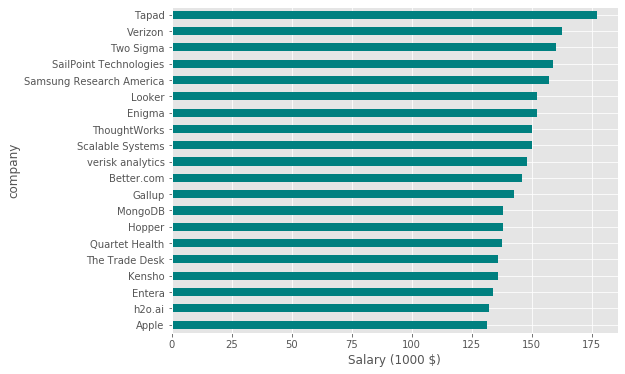

In [167]:
data2.groupby('company')['sal_mid'].mean().sort_values(ascending = False)[:20][::-1].plot.barh(color='teal')
plt.xlabel('Salary (1000 $)')

Text(0.5, 1.0, 'Histogram of Rating')

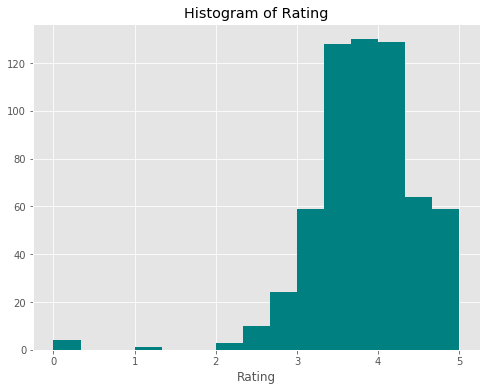

In [168]:
labels = ["{0} - {1}".format(i-0.5, i + 0.5) for i in range(1, 6)]
bins = [i-0.5 for i in range(1,7)]
labels ,bins      
data['ratingGroup'] = pd.cut(data.rating, [0.5,1.5,2.5,3.5,4.5,5.5], right=False, 
                           labels =labels)

data[['rating','ratingGroup']].head(10)
data.ratingGroup.value_counts()
dummy  = plt.hist(data['rating'].dropna(), bins =15, color ='teal')
plt.xlabel('Rating')
plt.ylabel('')
plt.title('Histogram of Rating')

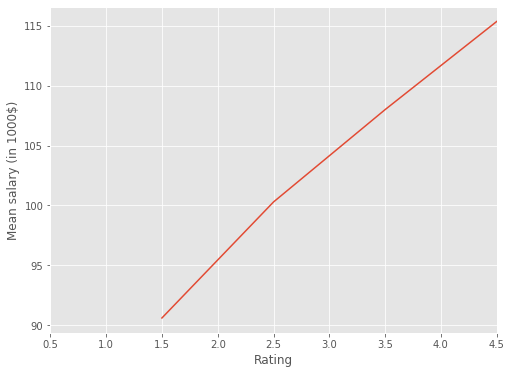

In [169]:
data.groupby('ratingGroup')['sal_mid'].mean()
data.groupby('ratingGroup')['sal_mid'].mean().reset_index()
data.groupby('ratingGroup')['sal_mid'].mean().plot()
plt.ylabel('Mean salary (in 1000$)')
plt.xlabel('Rating')
locs, labels = plt.xticks()
dum = plt.xticks(locs, np.linspace(0.5,5.5,11))

Text(0, 0.5, 'salary (in 1000$)')

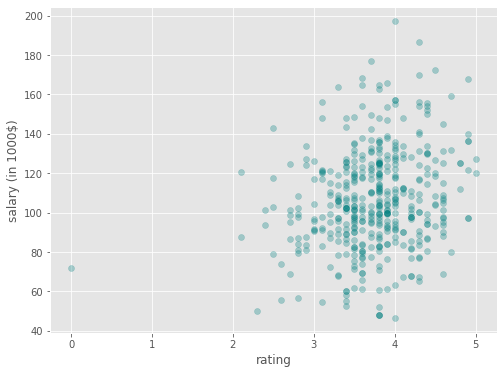

In [170]:
plt.scatter(data['rating'],data['sal_mid'], color = 'teal',alpha =0.3)
plt.xlabel('rating')
plt.ylabel('salary (in 1000$)')

3.764320785597381
243 66 258


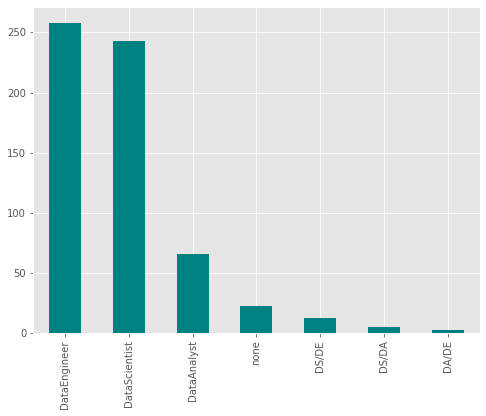

In [171]:
job_dict = {}
job_dict ={'DS':"(scientist|science)",
                'DE' : "(engineer|developer)",
                'DA':"analyst"         
          }
data['DS'] = data['position'].apply(lambda x: len(re.findall(job_dict['DS'],x))>0 )
data['DA'] = data['position'].apply(lambda x: len(re.findall(job_dict['DA'],x))>0 )
data['DE'] = data['position'].apply(lambda x: len(re.findall(job_dict['DE'],x))>0 )
data.shape[0]
data.DS.sum(), data.DA.sum(), data.DE.sum()
data[data.DS].shape[0], data[data.DA].shape[0], data[data.DE].shape[0]

#job title does not include analyst, scientist or engineer
data_none  = data[np.logical_and(np.logical_and(data.DS ==False, data.DA ==False), data.DE ==False)]

data_DS_only = data[np.logical_and(np.logical_and(data.DE ==False, data.DA ==False), data.DS ==True)]
data_DA_only = data[np.logical_and(np.logical_and(data.DS ==False, data.DE ==False), data.DA ==True)]
data_DE_only = data[np.logical_and(np.logical_and(data.DS ==False, data.DA ==False), data.DE ==True)]
print(data_none.shape[0]/data.shape[0] *100)
print(data_DS_only.shape[0], data_DA_only.shape[0], data_DE_only.shape[0])

data_none['position'].head(10)

data['job_code'] = 100*data.DS + 10*data.DE + data.DA
data['job_code'] = data['job_code'].astype('category')
data['job_code'] = data['job_code'].cat.rename_categories({
    100: 'DataScientist',
    10: 'DataEngineer',
    1: 'DataAnalyst',
    0: 'none',
    110:'DS/DE',
    101:'DS/DA',
    11:'DA/DE',
    111:'DS/DA/DE'
                }) 
data['job_code'].value_counts()

data['job_code'].value_counts().plot.bar(color ='teal')

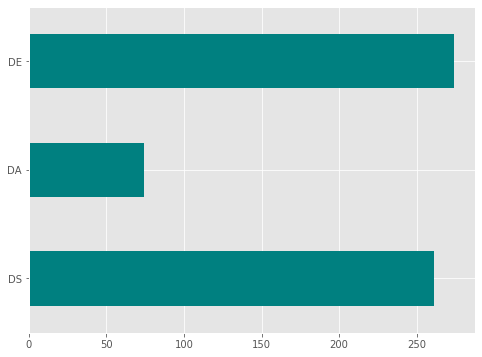

In [172]:
data[['DS','DA','DE']].sum().plot.barh(color ='teal')

python  :  28
r  :  610
java  :  4
c++  :  0
sql  :  8
excel  :  119
scala  :  137
stata  :  0
sas  :  9
spark  :  17
hadoop  :  3
cloudera  :  0
mongodb  :  0
tableau  :  0
hive  :  5
tensorflow  :  2
django  :  0
aws  :  35
mahout  :  0
matlab  :  0
cassandra  :  0
mapreduce  :  1


Text(0, 0.5, 'Number of jobs')

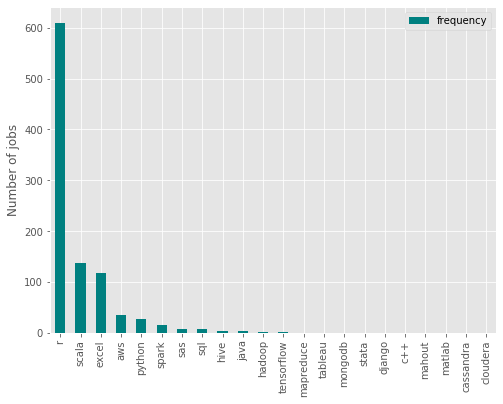

In [173]:
data.description.head()
data['description'].apply(lambda x: "hadoop" in x).head()
data['description'].apply(lambda x: "hadoop" in x).sum()
data['description'].apply(lambda x: "hadoop"  not in x).sum()

def tool_freq(tool):
    return data['description'].apply(lambda x: tool in x).sum()

tools = ['python','r','java','c++','sql','excel','scala','stata','sas','spark','hadoop',
         'cloudera','mongodb','tableau','hive','tensorflow','django','aws','mahout','matlab','cassandra','mapreduce'] #'bokeh','clojure'

skill_dict = {}
for tool in tools:
    print(tool,' : ',tool_freq(tool))
    skill_dict[tool] = tool_freq(tool)
    
skill_dict

data_job = pd.DataFrame.from_dict(skill_dict, orient='index')
data_job.columns = ['frequency']
data_job.head()

dummy = data_job.sort_values(by ='frequency', ascending = False).plot(kind ='bar', color ='teal')
plt.ylabel('Number of jobs')

Text(0.5, 1.0, 'Histogram of Salary')

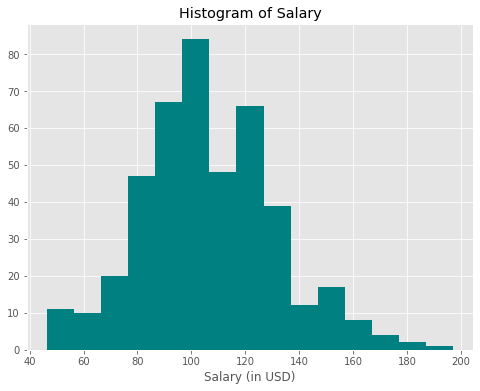

In [174]:
salary  = plt.hist(data['sal_mid'].dropna(), bins =15, color ='teal')
plt.xlabel('Salary (in USD)')
plt.ylabel('')
plt.title('Histogram of Salary')